In [ ]:
#Mengubah nilai pada kolom 'tinggi_badan' dari inci ke centimeter kemudian, pada kolom 'berat_badan' diubah dari pon ke kilogram.
import pandas as pd
df=pd.read_csv(r"C:\Users\Kalambe'\Desktop\Pembuatan Aplikasi Konsentrasi\raw_uji.csv")
df['tinggi_badan']=df['tinggi_badan']*2.54
df['berat_badan']=df['berat_badan']*0.453592
#df.to_csv(r"C:\Users\Kalambe'\Desktop\Pembuatan Aplikasi Konsentrasi\uji.csv",index=False)

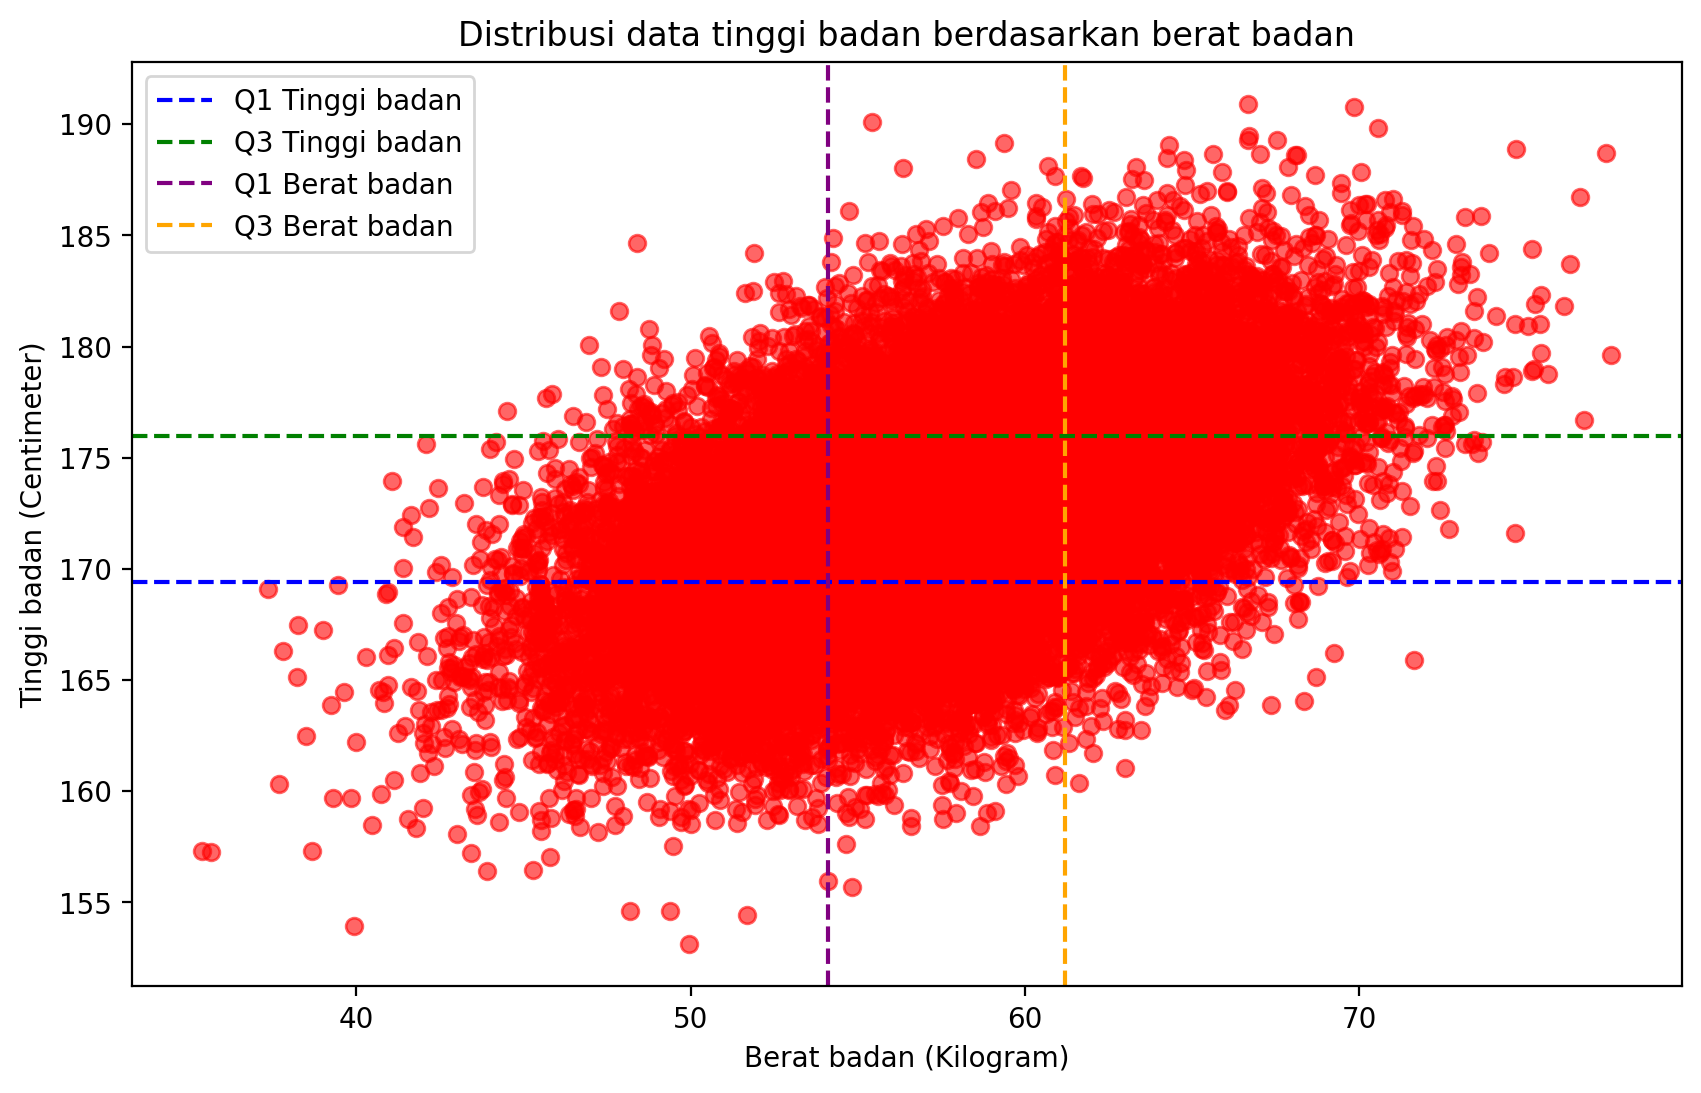

In [3]:
#Visualisasi 1: Scatter plot dengan outlier
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Kalambe'\Desktop\Pembuatan Aplikasi Konsentrasi\uji.csv")
height='tinggi_badan'
weight='berat_badan'
Q1_height=df[height].quantile(0.25)
Q3_height=df[height].quantile(0.75)
IQR_height=Q3_height-Q1_height
Q1_weight=df[weight].quantile(0.25)
Q3_weight=df[weight].quantile(0.75)
IQR_weight=Q3_weight-Q1_weight
plt.figure(figsize=(10,6),dpi=200)
plt.scatter(df[weight],df[height],color='red',alpha=0.6)
plt.xlabel('Berat badan (Kilogram)')
plt.ylabel('Tinggi badan (Centimeter)')
plt.title('Distribusi data tinggi badan berdasarkan berat badan')
plt.grid(False)
plt.axhline(Q1_height,color='blue',linestyle='--',label='Q1 Tinggi badan')
plt.axhline(Q3_height,color='green',linestyle='--',label='Q3 Tinggi badan')
plt.axvline(Q1_weight,color='purple',linestyle='--',label='Q1 Berat badan')
plt.axvline(Q3_weight,color='orange',linestyle='--',label='Q3 Berat badan')
plt.legend()
plt.show()

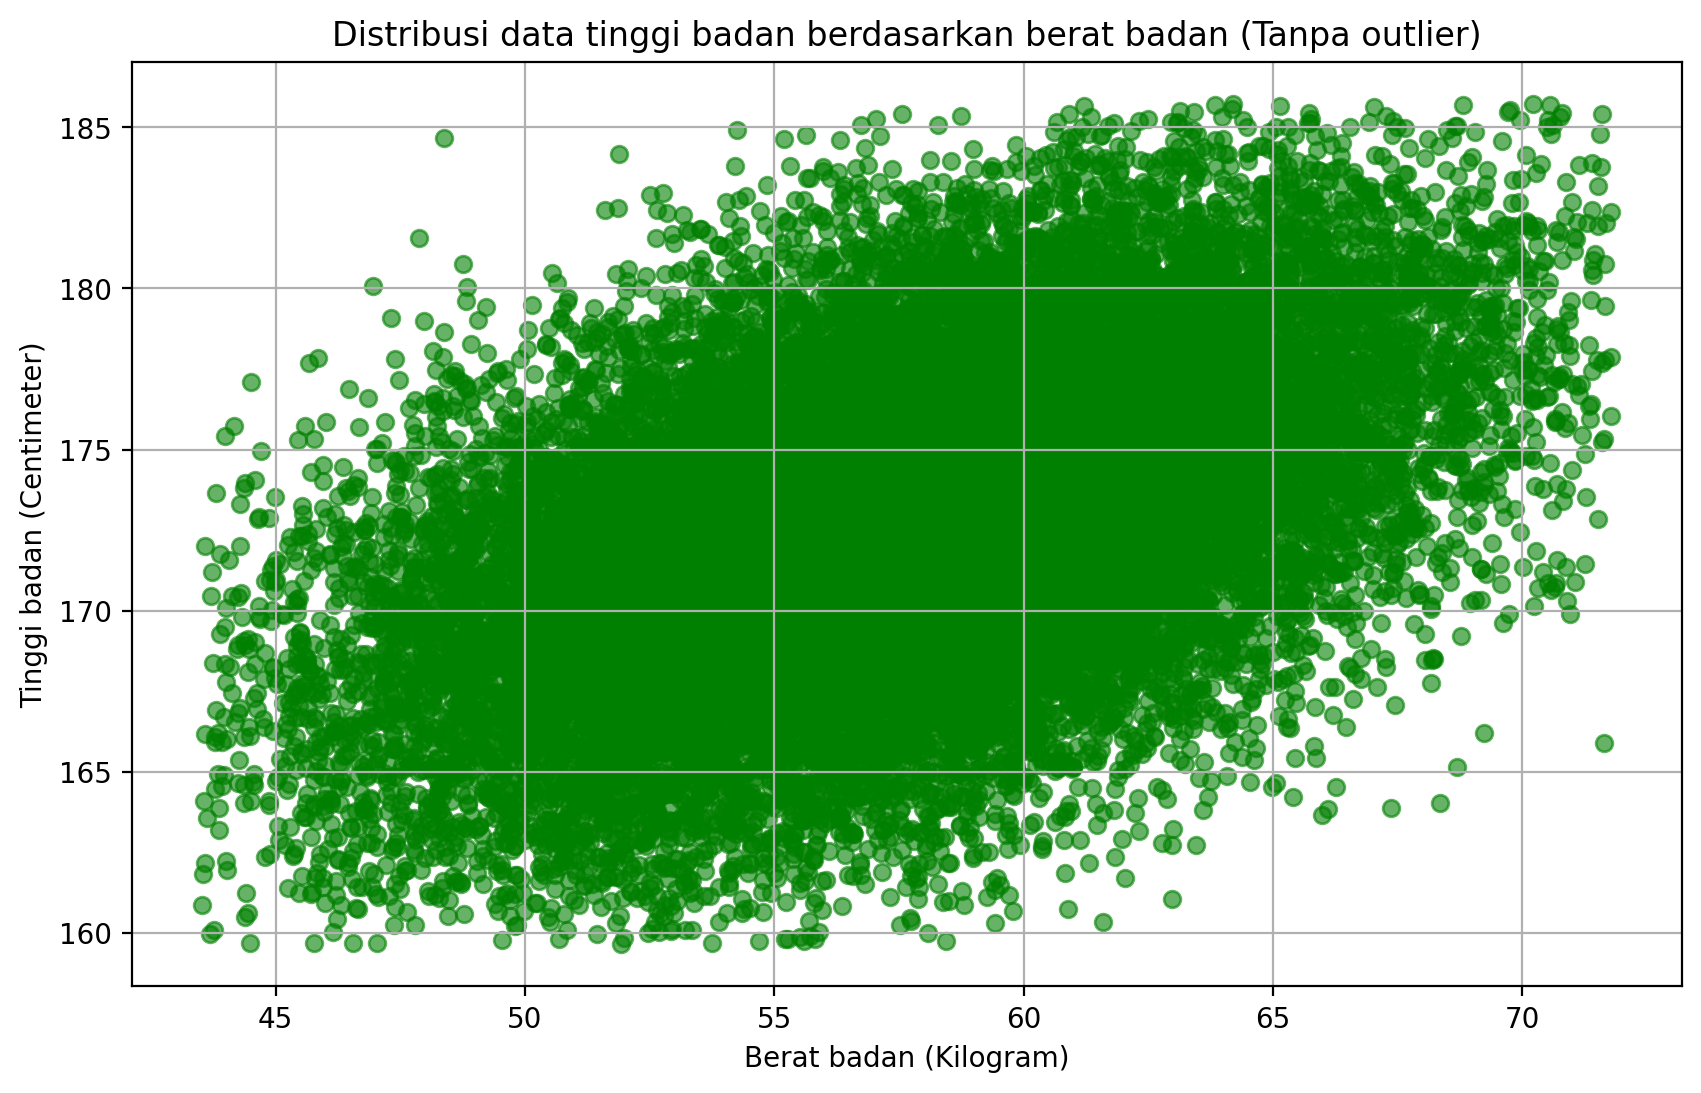

In [4]:
#Visualisasi 2: Scatter plot tanpa outlier
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Kalambe'\Desktop\Pembuatan Aplikasi Konsentrasi\uji.csv")
height='tinggi_badan'
weight='berat_badan'
Q1_height=df[height].quantile(0.25)
Q3_height=df[height].quantile(0.75)
IQR_height=Q3_height-Q1_height
Q1_weight=df[weight].quantile(0.25)
Q3_weight=df[weight].quantile(0.75)
IQR_weight=Q3_weight-Q1_weight
lower_bound_height=Q1_height-1.5*IQR_height
upper_bound_height=Q3_height+1.5*IQR_height
lower_bound_weight=Q1_weight-1.5*IQR_weight
upper_bound_weight=Q3_weight+1.5*IQR_weight
df_cleaned=df[
    (df[height]>=lower_bound_height)&(df[height]<=upper_bound_height)&
    (df[weight]>=lower_bound_weight)&(df[weight]<=upper_bound_weight)
]
plt.figure(figsize=(10,6),dpi=200)
plt.scatter(df_cleaned[weight],df_cleaned[height],color='green',alpha=0.6)
plt.xlabel('Berat badan (Kilogram)')
plt.ylabel('Tinggi badan (Centimeter)')
plt.title('Distribusi data tinggi badan berdasarkan berat badan (Tanpa outlier)')
plt.grid(True)
plt.show()
#df_cleaned.to_csv(r"C:\Users\Kalambe'\Desktop\Pembuatan Aplikasi Konsentrasi\latih.csv",index=False)

In [5]:
#Analisis: Menghitung koefisien korelasi pearson
# Jika mendekati 1, ada korelasi positif linear yang kuat.
# Jika mendekati -1, ada korelasi negatif linear yang kuat.
# Jika mendekati 0, maka tidak ada korelasi linear yang kuat.
# Nilai-p, menunjukkan signifikansi statistik dari korelasi. Jika nilai-p kurang dari 0.05, korelasi dianggap signifikan dengan tingkat kepercayaan 95%.
import pandas as pd
from scipy.stats import pearsonr
df=pd.read_csv(r"C:\Users\Kalambe'\Desktop\Pembuatan Aplikasi Konsentrasi\latih.csv")
x=df['berat_badan']
y=df['tinggi_badan']
correlation,p_value=pearsonr(x,y)
print(f"Koefisien Korelasi Pearson: {correlation}")
print(f"Nilai-p                   : {p_value}")

Koefisien Korelasi Pearson: 0.48205747725983883
Nilai-p                   : 0.0


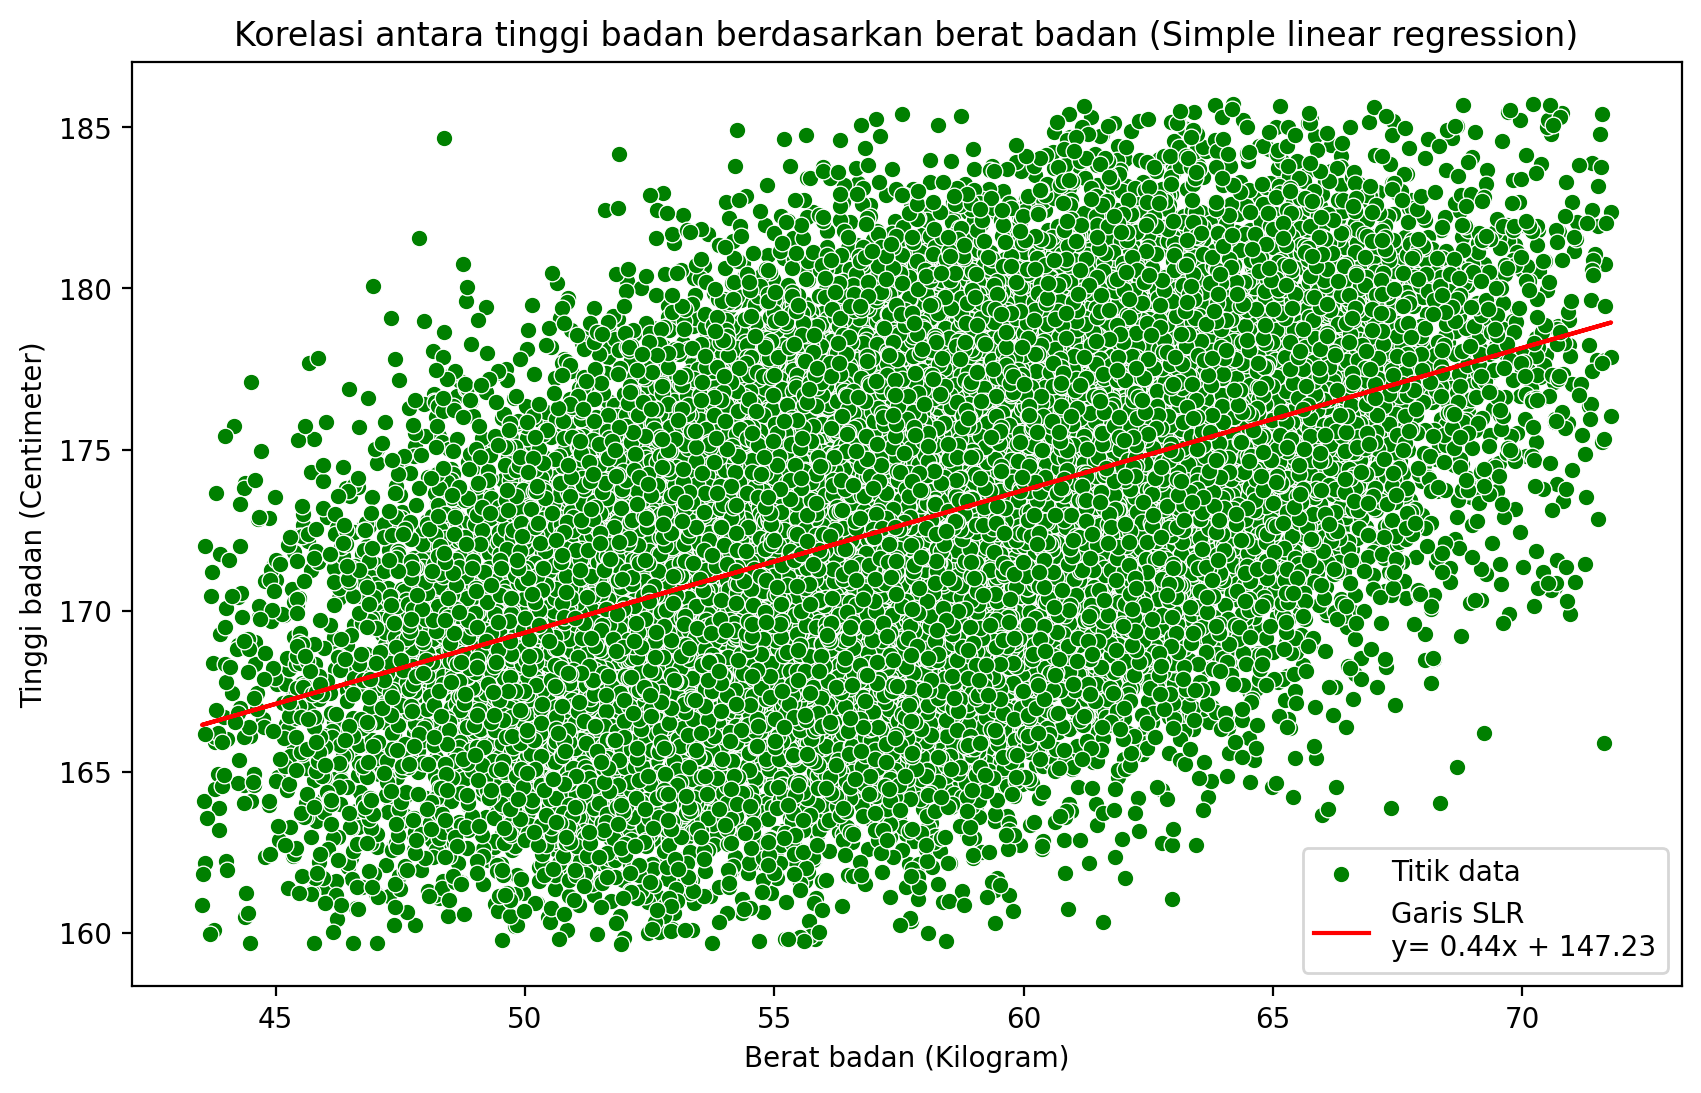

In [6]:
#Pemodelan: Simple linear regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
data=pd.read_csv(r"C:\Users\Kalambe'\Desktop\Pembuatan Aplikasi Konsentrasi\latih.csv")
x=data['berat_badan']
y=data['tinggi_badan']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=x,y=y,color='green',label='Titik data')
plt.plot(x,intercept+slope*x,color='red',label=f'Garis SLR\ny= {slope:.2f}x + {intercept:.2f}')
plt.title('Korelasi antara tinggi badan berdasarkan berat badan (Simple linear regression)')
plt.xlabel('Berat badan (Kilogram)')
plt.ylabel('Tinggi badan (Centimeter)')
plt.legend()
plt.show()

Nilai MAE (Mean Absolute Error): 3.2780453770837963 Centimeter
Hasil Simple Linear Regression: Tinggi badan (Centimeter) = 0.44 * Berat badan (Kilogram) + 147.48


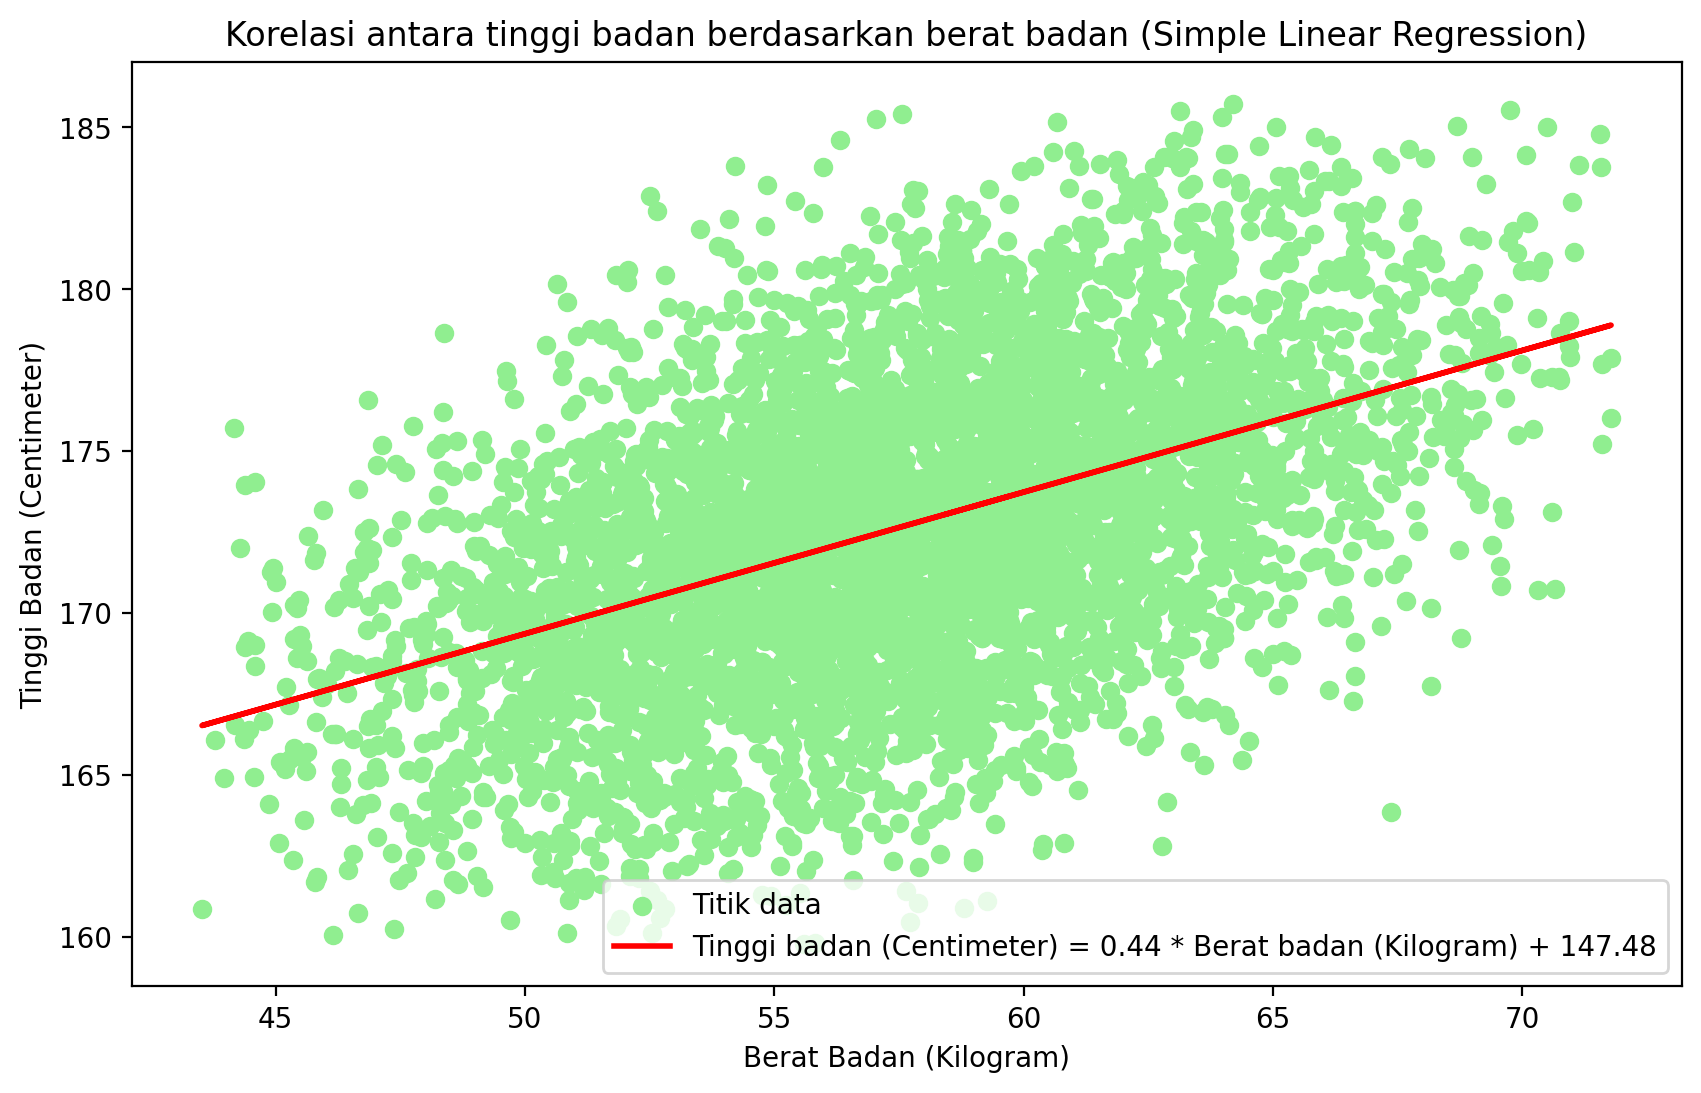

In [7]:
#Evaluasi: Mean absolute error
#MAE yang lebih kecil menunjukkan bahwa prediksi model lebih mendekati nilai aktual, yang berarti model memiliki performa yang baik.
#Nilai MAE yang tinggi, sebaliknya, mengindikasikan bahwa model memiliki kesalahan prediksi yang cukup besar dan mungkin perlu diperbaiki.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Kalambe'\Desktop\Pembuatan Aplikasi Konsentrasi\latih.csv")
X=df[['berat_badan']]
y=df['tinggi_badan']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
print(f'Nilai MAE (Mean Absolute Error): {mae} Centimeter')
print(f'Hasil Simple Linear Regression: Tinggi badan (Centimeter) = {model.coef_[0]:.2f} * Berat badan (Kilogram) + {model.intercept_:.2f}')
plt.figure(figsize=(10,6),dpi=200)
plt.scatter(X_test,y_test,color='lightgreen',label='Titik data')
plt.plot(X_test,y_pred,color='red',linewidth=2,label=f'Tinggi badan (Centimeter) = {model.coef_[0]:.2f} * Berat badan (Kilogram) + {model.intercept_:.2f}')
plt.xlabel('Berat Badan (Kilogram)')
plt.ylabel('Tinggi Badan (Centimeter)')
plt.title('Korelasi antara tinggi badan berdasarkan berat badan (Simple Linear Regression)')
plt.legend()
plt.show()

Simple Linear Regression: Tinggi badan (Centimeter) = 0.44 * Berat badan (Kilogram) + 147.62
Nilai MAE (Mean Absolute Error): 3.256754776884295 Centimeter
MAE pada fold ke-1: 3.27 Centimeter
MAE pada fold ke-2: 3.29 Centimeter
MAE pada fold ke-3: 3.26 Centimeter
MAE pada fold ke-4: 3.21 Centimeter
MAE pada fold ke-5: 3.33 Centimeter
MAE pada fold ke-6: 3.24 Centimeter
MAE pada fold ke-7: 3.33 Centimeter
MAE pada fold ke-8: 3.31 Centimeter
MAE pada fold ke-9: 3.25 Centimeter
MAE pada fold ke-10: 3.36 Centimeter
Rata-rata MAE dari 10 fold: 3.284350439389602 Centimeter
Standar deviasi MAE dari 10 fold: 0.04 Centimeter


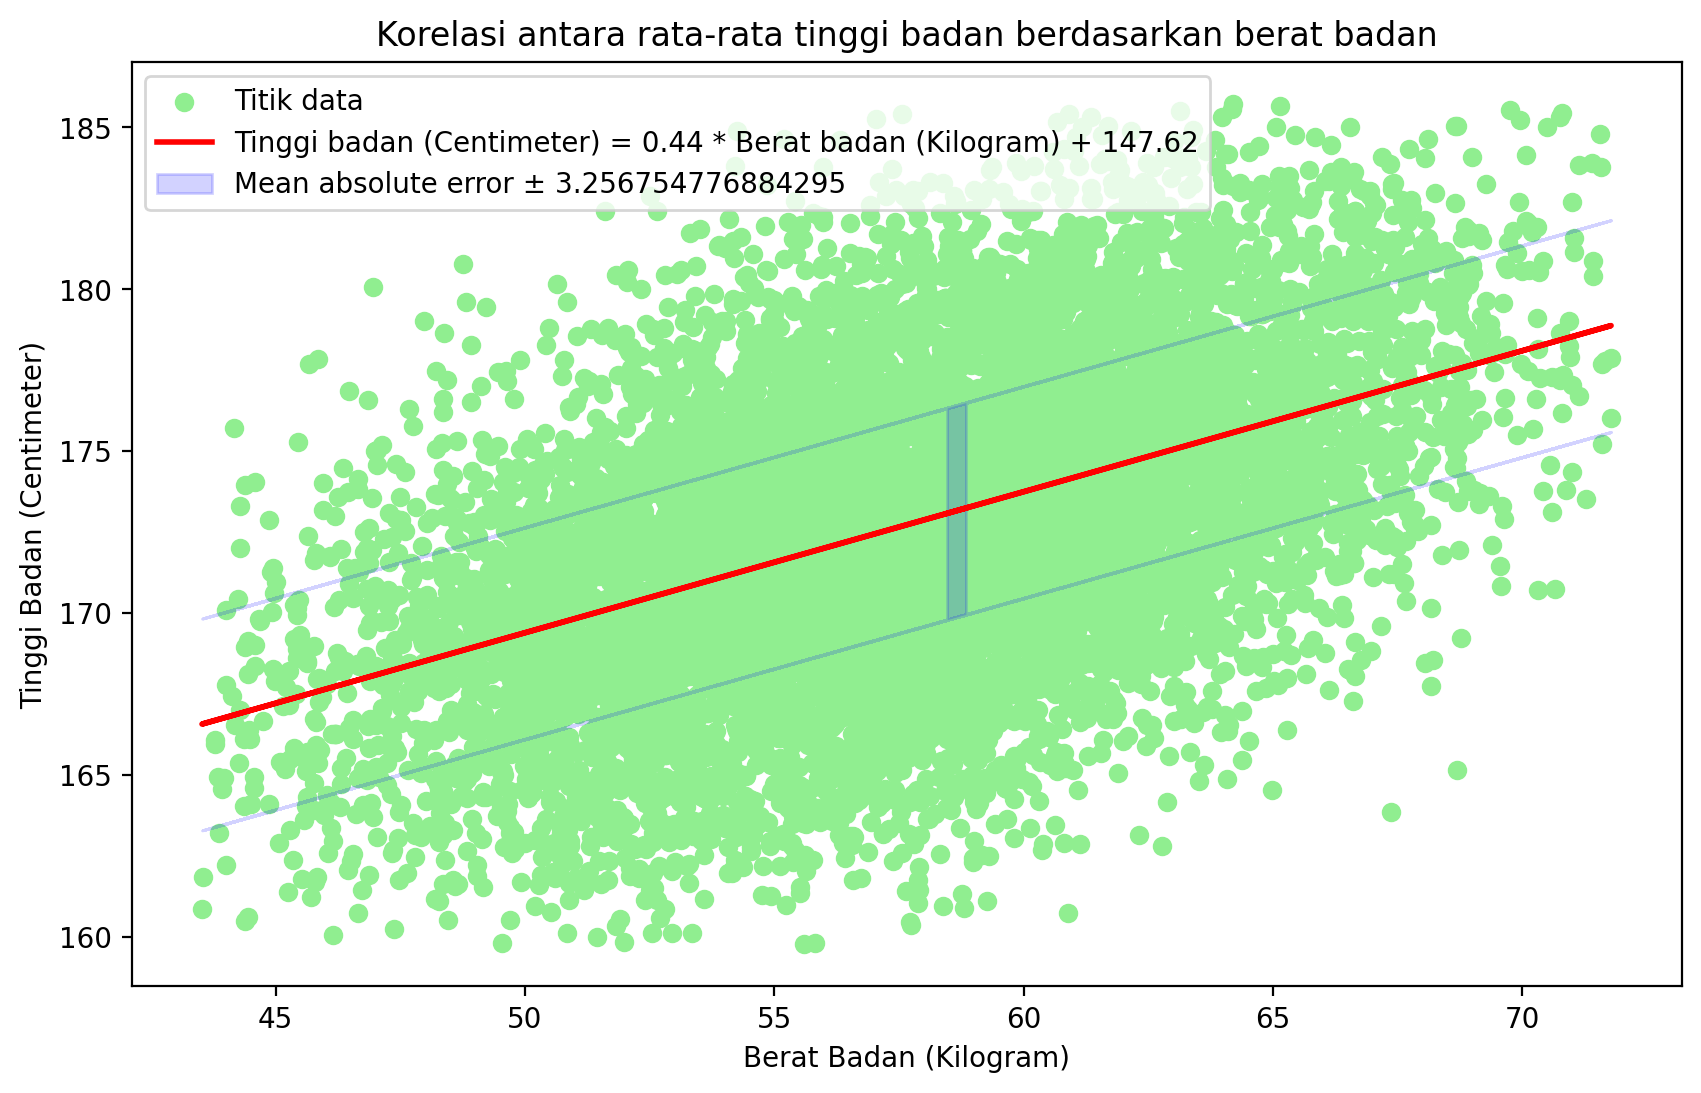

In [8]:
#Uji reabilitas dan validitas: Validasi silang K-fold dan standar deviasi pada K-fold
#Validasi silang K-fold, memberikan evaluasi yang lebih akurat dan stabil dibandingkan hanya menggunakan satu pembagian data (train-test split).
#Membantu mengidentifikasi jika model hanya bekerja baik pada data latih tetapi buruk pada data uji.
#Standar deviasi MAE mengukur stabilitas model dalam memprediksi nilai target pada data yang berbeda-beda.
#Jika standar deviasi<=0.5, maka Model memiliki kinerja yang konsisten di semua fold.
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv(r"C:\Users\Kalambe'\Desktop\Pembuatan Aplikasi Konsentrasi\latih.csv")
X=df[['berat_badan']]
y=df['tinggi_badan']

# Pembagian data latih dan data uji
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
print(f'Simple Linear Regression: Tinggi badan (Centimeter) = {model.coef_[0]:.2f} * Berat badan (Kilogram) + {model.intercept_:.2f}')
print(f'Nilai MAE (Mean Absolute Error): {mae} Centimeter')
k=10
kf=KFold(n_splits=k,shuffle=True,random_state=42)
mae_scorer=make_scorer(mean_absolute_error,greater_is_better=False)
neg_mae_scores=cross_val_score(model,X,y,cv=kf,scoring=mae_scorer)
mae_scores=-neg_mae_scores
average_mae=mae_scores.mean()
std_mae=mae_scores.std()
for i, score in enumerate(mae_scores,1):
    print(f'MAE pada fold ke-{i}: {score:.2f} Centimeter')
print(f'Rata-rata MAE dari {k} fold: {average_mae} Centimeter')
print(f'Standar deviasi MAE dari {k} fold: {std_mae:.2f} Centimeter')
plt.figure(figsize=(10,6),dpi=200)
plt.scatter(X_test,y_test,color='lightgreen',label='Titik data')
plt.plot(X_test,y_pred,color='red',linewidth=2,label=f'Tinggi badan (Centimeter) = {model.coef_[0]:.2f} * Berat badan (Kilogram) + {model.intercept_:.2f}')
plt.fill_between(X_test.values.flatten(),y_pred-average_mae,y_pred+mae,color='blue',alpha=0.175,label=f'Mean absolute error ± {mae}')
plt.xlabel('Berat Badan (Kilogram)')
plt.ylabel('Tinggi Badan (Centimeter)')
plt.title(f'Korelasi antara rata-rata tinggi badan berdasarkan berat badan')
plt.legend()
plt.show()

In [9]:
#Uji coba 1: Cari nilai tinggi badan
x=float(input("Masukkan berat badan (Kilogram): "))
y_lebih=((0.44*x)+147.62)+3.25
y_kurang=((0.44*x)+147.62)-3.25
print(f"Tinggi badan: {int(y_lebih)} Centimeter")
print("\natau\n")
print(f"Tinggi badan: {int(y_kurang)} Centimeter")

Tinggi badan: 174 Centimeter

atau

Tinggi badan: 168 Centimeter
